# Assignment 3
Author: Kamran Karim

Student ID: _20594936_

# PART A

# Q1

In [1]:
import pandas as pd
import numpy as np

In [79]:
dat0 = np.array([  [1,0.05],[0,0.95]])
f0 = pd.DataFrame(data=dat0, columns=["Trav", "f0"])

dat1 = np.array([[1, 1,1,0.9], [1, 1,0,0.1],[1, 0,1,0.9], [1, 0,0,0.1],[0, 1,1,0.1], [0, 1,0,0.9],[0, 0,1,0.01], [0, 0,0,0.99]])
f1 = pd.DataFrame(data=dat1, columns=["Trav", "Fraud", "FP", "f1"])

dat2= np.array([[1,0.6],[0,0.4]])
f2 = pd.DataFrame(data=dat2, columns=["OC", "f2"])

dat3 = np.array([[1, 1,1,0.02], [1, 1,0,0.98],[1, 0,1,0.01], [1, 0,0,0.99],[0, 1,1,0.011], [0, 1,0,0.899],[0, 0,1,0.001], [0, 0,0,0.999]])
f3 = pd.DataFrame(data=dat3, columns=["OC", "Fraud", "IP", "f3"])

dat4 = np.array([[1,1,0.1],[1,0,0.9],[0,1,0.01],[0,0,0.99]])
f4 = pd.DataFrame(data=dat4, columns=["OC", "CRP", "f4"])

dat5 = np.array([ [1,1,0.01],[1,0,0.99],[0,1,0.004],[0,0,0.996] ])
f5 = pd.DataFrame(data=dat5, columns=["Trav", "Fraud", "f5"])

In [130]:
def restrict(factor, variable, value):
    if variable in factor.columns:
        d = factor[factor[variable] == value]
        d = d.drop(columns = variable) 
    else:
        d = factor
    return d


def multiply(factor1, factor2):
    if factor1.equals(factor2):
        return factor1
    c1 = list(factor1.columns)
    c2 = list(factor2.columns)
    common_fac=[value for value in c1 if value in c2]
    #common_fac[0]
    joint_table = pd.merge(factor1, factor2, on=common_fac)#[0])
    a = c1.pop()
    b = c2.pop()
    joint_table[a+b]=joint_table[a]*joint_table[b]  
    jt = joint_table.drop(columns = list((a,b)))
    return jt







def sumout(factor, variable):
    colnames =  list(factor.columns)
    colnames.pop()
    colnames.remove(variable)   #remove, variable from the list
    cols = list(colnames)
    l = len(cols)
    colnames.append("f")
    d = pd.DataFrame(columns = colnames)
    n=0
    for i in cols:
        d1_0 = restrict(factor,i, 0)
        d1_1 = restrict(factor,i, 1)
        if n>0:
            break
        if l >1:
            for j in cols:
                if i!= j:
                    d2_0_0 = restrict(d1_0, j,0)
                    d2_0_1 = restrict(d1_0, j,1)
                    d2_1_0 = restrict(d1_1, j,0)
                    d2_1_1 = restrict(d1_1, j,1)
                    d.loc[n] = list((0,0,d2_0_0.sum(axis = 0)[1]))
                    n+=1
                    d.loc[n] = list((0,1,d2_0_1.sum(axis = 0)[1]))
                    n+=1
                    d.loc[n] = list((1,0,d2_1_0.sum(axis = 0)[1]))
                    n+=1
                    d.loc[n] = list((1,1,d2_1_1.sum(axis = 0)[1]))


        else:
            d.loc[n] = list((0,d1_0.sum(axis = 0)[1]))
           # d.append([0,d1_0.sum(axis = 0)[2]])
            n+=1
            d.loc[n] = list((1,d1_1.sum(axis = 0)[1]))
           # d.append([1,d1_1.sum(axis = 0)[2]])
    return d


def normalise(factor):
    d = pd.DataFrame( columns=list(factor.columns))
    ind = list(factor.index)
    for i in ind:
        d.loc[i] = list((factor.loc[i][0],factor.loc[i][1]/factor.sum(axis = 0)[1]))
    return d

#testing 
print("restrict")
print()
print(restrict(f1, "FP", 1))
print()
print("multiply")
print()
fac1 = restrict(f1, "FP", 1)
fac2 = restrict(f3, "IP", 1)
print(multiply(fac1,fac2))
print()
print("sumout")
print()
print(sumout(f1, "Fraud"))
print()
print("normalise" )
print()
print(sumout(sumout(f1, "Fraud"), "Trav"))
print()
print("TO")
print()
print(normalise(sumout(sumout(f1, "Fraud"), "Trav")))


restrict

   Trav  Fraud    f1
0   1.0    1.0  0.90
2   1.0    0.0  0.90
4   0.0    1.0  0.10
6   0.0    0.0  0.01

multiply

   Trav  Fraud   OC     f1f3
0   1.0    1.0  1.0  0.01800
1   1.0    1.0  0.0  0.00990
2   0.0    1.0  1.0  0.00200
3   0.0    1.0  0.0  0.00110
4   1.0    0.0  1.0  0.00900
5   1.0    0.0  0.0  0.00090
6   0.0    0.0  1.0  0.00010
7   0.0    0.0  0.0  0.00001

sumout

   Trav   FP     f
0   0.0  0.0  1.89
1   0.0  1.0  0.11
2   1.0  0.0  0.20
3   1.0  1.0  1.80

normalise

    FP     f
0  0.0  2.09
1  1.0  1.91

TO

    FP       f
0  0.0  0.5225
1  1.0  0.4775


In [192]:
def inference(factors, query_var, hidden, evidence):
    if len(evidence) >0:
        for i in evidence:
            for j in factors:
                factors[j] = restrict(factors[j], i, evidence[i])
    if 0 in factors:
        mult = factors[0]
    elif 1 in factors:
        mult = factors[1]
    elif 2 in factors:
        mult = factors[2]
    elif 3 in factors:
        mult = factors[3]

    extra = dict()
    for i in factors:
        cols1 = mult.columns
        cols2 = factors[i].columns
        cols = [value for value in cols1 if value in cols2]
        if len(cols)>0:
            mult = multiply(mult, factors[i])
        else:
            extra[i] = factors[i]
    if len(extra)>0:
        for i in extra:
            mult = multiply(mult, extra[i])
    sums = mult
    for i in hidden:
        sums = sumout(sums, i)
    final = normalise(sums)
    return final

# Q2 part a

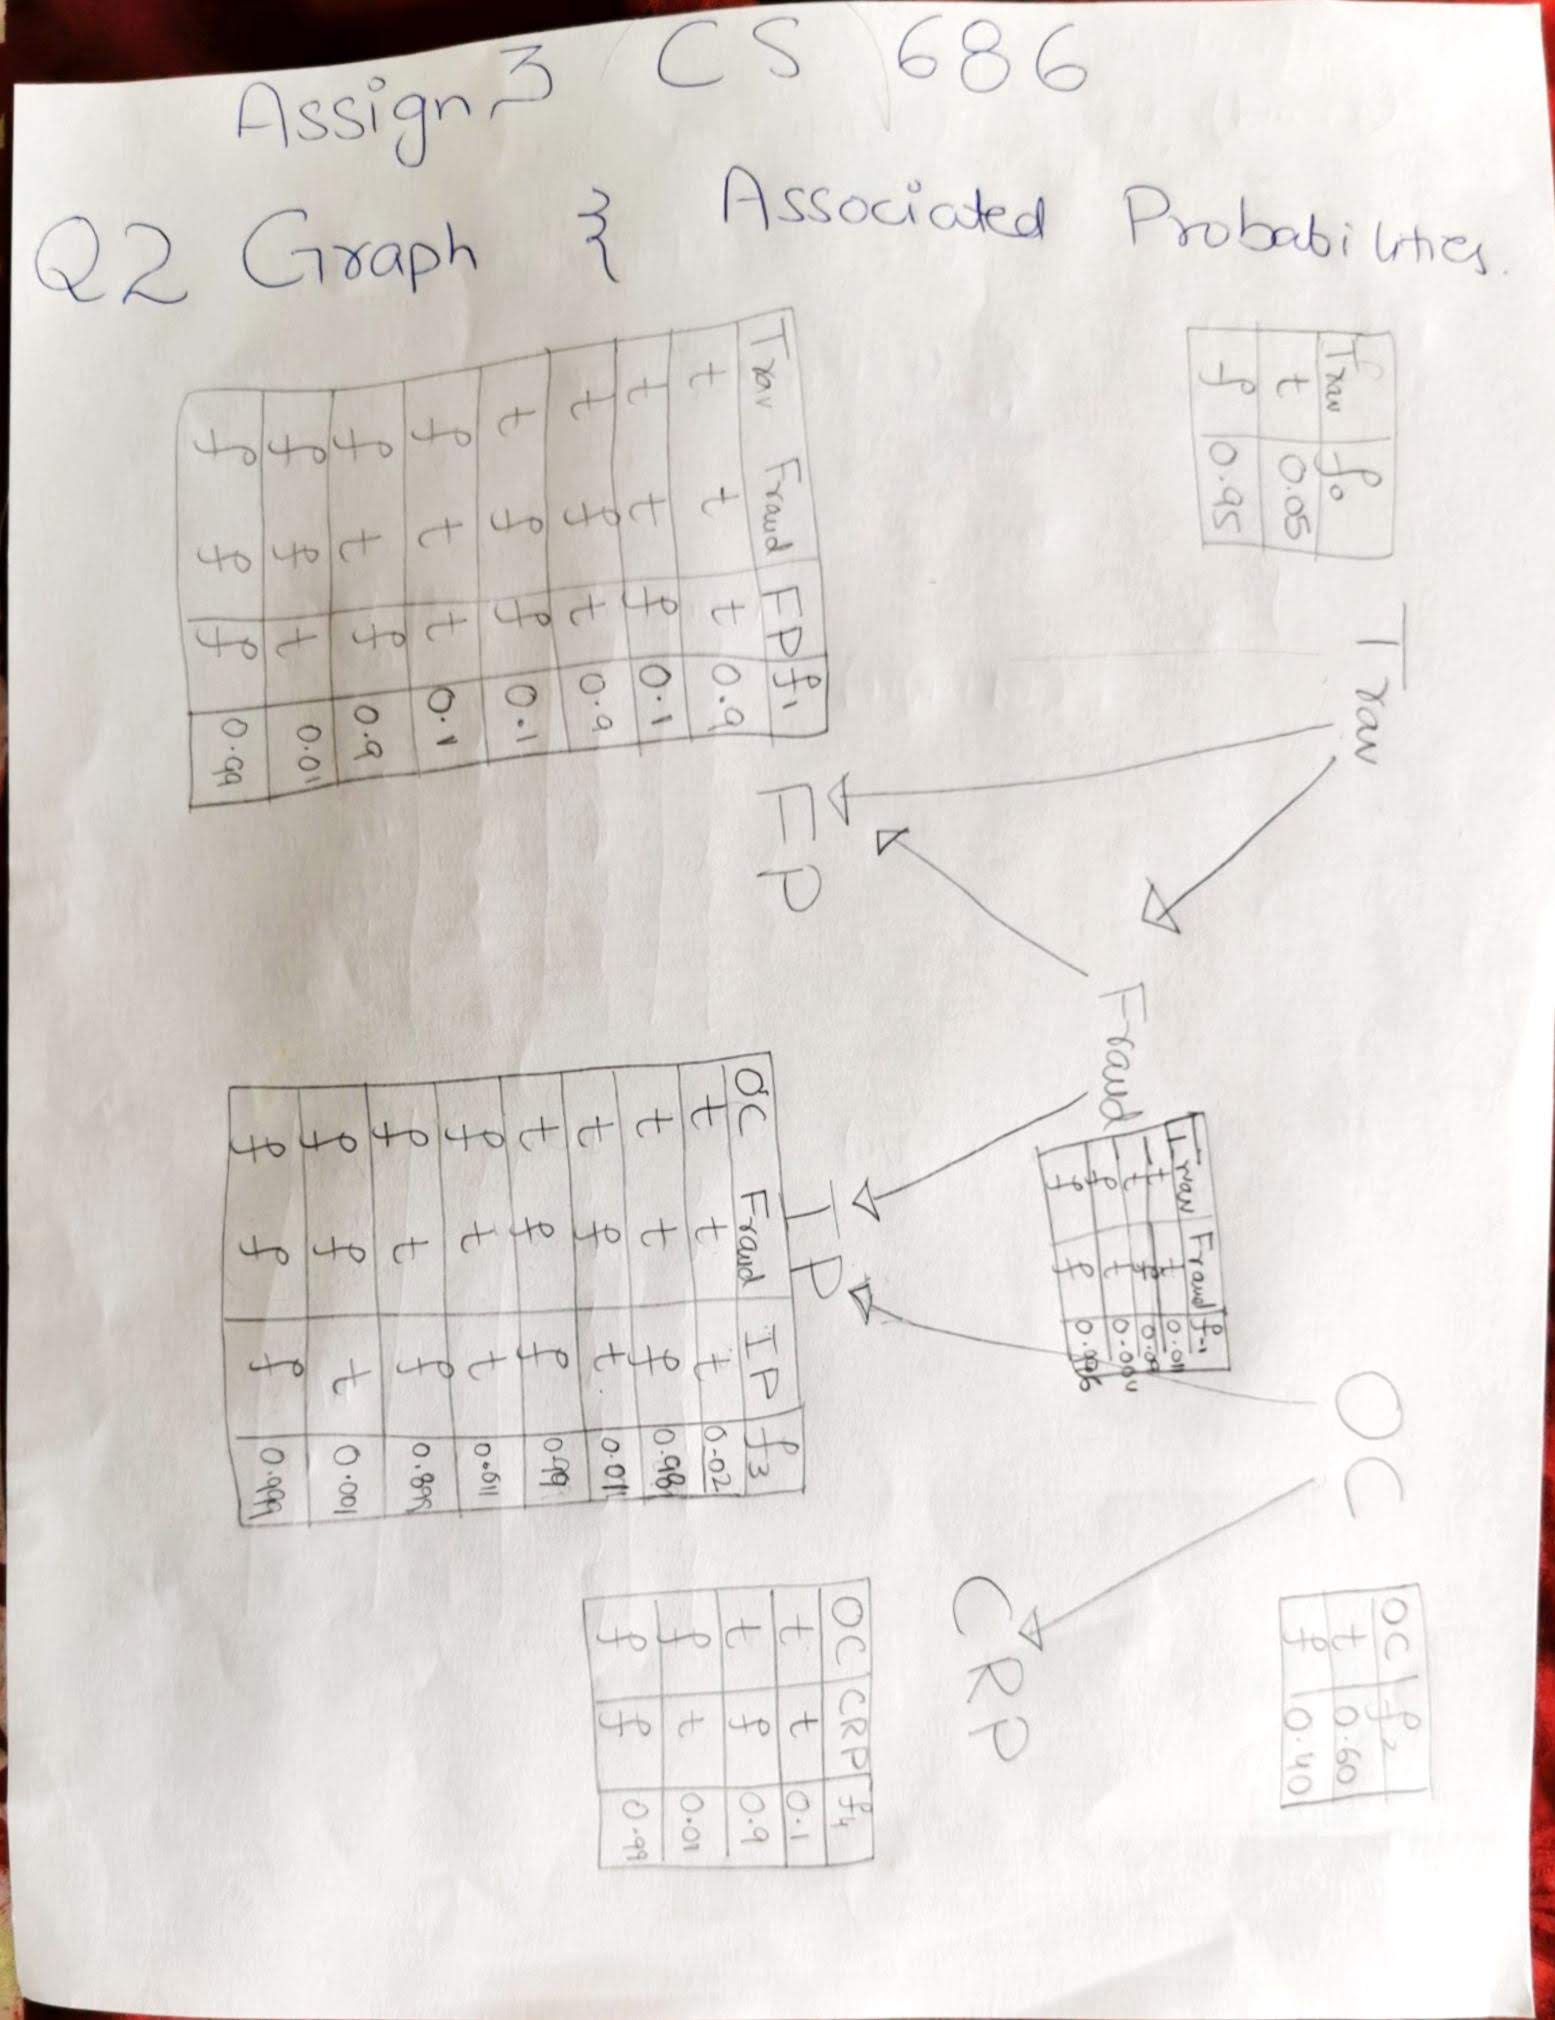

In [209]:
from IPython.display import Image
fig1 = Image(filename=("Q2_A3.jpg"))
fig1

# part b

In [210]:
factors = dict()
factors[0] = f0
factors[5] = f5
query_var = "Fraud"
hidden = list(("Trav",""))
hidden.pop()
evidence = list()
print("Prior prob of Fraud; 0 is no fraud, 1 is existance of Fraud")
print()
prior = inference(factors, query_var, hidden, evidence)
print(prior)



factors = dict()
factors[0] = f0
factors[1] = f1
factors[2] = f2
factors[3] = f3
factors[4] = f4
factors[5] = f5



evidence = dict()
evidence["FP"] = 1
evidence["IP"] = 0
evidence["CRP"] = 1

hidden = list(("Trav", "OC"))

print()
query = "Fraud"
print("Prob of Fraud given FP, not IP, CRP ; 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))




Prior prob of Fraud; 0 is no fraud, 1 is existance of Fraud

   Fraud       f
0    0.0  0.9957
1    1.0  0.0043

Prob of Fraud given FP, not IP, CRP ; 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.985101
1    1.0  0.014899


# part c

In [211]:
evidence["Trav"] = 1

hidden = list(("OC",""))
hidden.pop()
if 0 in factors:
    del factors[0]
print("Prob of Fraud given FP, not IP, CRP and new info about Trav = true; 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))

Prob of Fraud given FP, not IP, CRP and new info about Trav = true; 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.990156
1    1.0  0.009844


Hence, change in probability of fraud is that it will go down from 1.49% to 0.98%

# part d

In [212]:
factors = dict()
factors[0] = f0
#factors[1] = f1
factors[3] = f3
#factors[4] = f4
factors[5] = f5
factors[2] = f2



evidence = dict()
evidence["IP"] = 1

hidden = list(( "Trav","OC"))
#hidden.pop()

print("Prob of Fraud given IP and no other evidence, 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))





Prob of Fraud given IP and no other evidence, 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.989055
1    1.0  0.010945


The Fraudster has 3 options now. In addition to making internet purchase, she can either make a Foriegn purchase (prob over the internet), or make a computer related purchase or do both.

In [213]:

factors[1] = f1

evidence["FP"] = 1

print("Prob of Fraud given IP and FP, 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))



factors[4] = f4
evidence["CRP"] = 1

print("Prob of Fraud given IP, FP and CRP, 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))

del factors[1] 
del evidence["CRP"]

print("Prob of Fraud given CRP, 0 is no fraud, 1 is existance of Fraud")
print()
print(inference(factors, query_var, hidden, evidence))

Prob of Fraud given IP and FP, 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.962114
1    1.0  0.037886
Prob of Fraud given IP, FP and CRP, 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.969321
1    1.0  0.030679
Prob of Fraud given CRP, 0 is no fraud, 1 is existance of Fraud

   Fraud         f
0    0.0  0.991184
1    1.0  0.008816


Note that every other pair increases the probability of fraud, only when the internet purchase is combines with Computer Related Purchase decreases the probability of fraud, which is intuitively also correct. Probability of fraud detection reduces from 1.09% to 0.88% (reduces to about a half).

# Part B

For each marking scheme, i have numbered each item as a,b,..,f to make the marker clear of what they are marking on.

# part a: print out of code

In [214]:
import pandas as pd
import numpy as np
import math
word_dict = pd.read_csv("words.txt", sep = ' ', names = ['word'])
test_dat = pd.read_csv("testData.txt", sep = ' ',names = ['docID','wordID'])
test_lab = pd.read_csv("testLabel.txt", sep = ' ',names = ['label'])
trn_dat = pd.read_csv("trainData.txt", sep = ' ',names = ['docID','wordID'])
trn_lab = pd.read_csv("trainLabel.txt", sep = ' ',names = ['label'])

In [215]:
def nb_model(trn_dat, word_dict):
    d = dict()
    trn_cl_1 = trn_dat[trn_dat['docID'] <=750]
    trn_cl_2 = trn_dat[trn_dat['docID'] >750]

    cnt_1 = trn_cl_1.shape[0]
    cnt_2 = trn_cl_2.shape[0]

    for i in range(word_dict.shape[0]):
        temp = trn_cl_1[trn_cl_1['wordID']== i+1]
        cls_1 = (temp.shape[0]  +1)/(cnt_1 +2)
        temp = trn_cl_2[trn_cl_2['wordID']== i+1]
        cls_2 = (temp.shape[0]  +1)/(cnt_2 +2)
        d[i+1] = (cls_1,cls_2)
    return d

In [248]:
def top_10(trn_dat,word_dict):
    dictn = nb_model(trn_dat, word_dict)
    d2 = dict()
    for key in dictn:
        d2[key] = abs(math.log(dictn[key][0],2)-math.log(dictn[key][1],2))
    d3 = d2.items()
    d3 = sorted(d3, key = lambda t : t[1], reverse = True)
    top_10 = d3[0:10]
    l = list()
    for i in top:
        l.append((word_dict.loc[i[0]-1])[0])
    return l

In [217]:
def accuracy(test_dat, test_lab, trn_dat, word_dict):
    test_lab['docID'] =range(len(test_lab))
    for i in range(len(test_lab)):
        test_lab['docID'][i] = i+1

    test_targ= pd.merge(test_dat, test_lab, on='docID')
    d = nb_model(trn_dat, word_dict)
    d1 = dict()
    d2 = dict()
    d3 = dict()
    d4 = dict()
    pr_cl1 = 0.5
    pr_cl2 = 0.5
    for i,j in test_targ.iterrows():
        if j['docID'] in d1:
            d1[j['docID']] = d1[j['docID']]*d[j['wordID']][0]#math.log(d[j['wordID']][0],2)
            d2[j['docID']] = d2[j['docID']]*d[j['wordID']][1]#math.log(d[j['wordID']][1],2)
        else:
            d4[j['docID']] = j['label']
            d1[j['docID']] = d[j['wordID']][0]*pr_cl1#math.log(d[j['wordID']][0],2)*pr_cl1
            d2[j['docID']] = d[j['wordID']][1]*pr_cl2#math.log(d[j['wordID']][1],2)*pr_cl2


    for key in d1:
        if d1[key]>d2[key]:
            d3[key] = 1
        elif d1[key]<d2[key]:
            d3[key] = 2
        else: 
            d3[key] = 3
    sum= 0
    for key in d3:
        if d3[key]==d4[key]:
            sum+=1
    accuracy= sum/len(d3)
    return accuracy

# part b: 10 most discriminative word features

In [249]:
top_10(trn_dat, word_dict)

['christian',
 'religion',
 'atheism',
 'christians',
 'books',
 'library',
 'religious',
 'libraries',
 'novel',
 'beliefs']

# part c: training and test accuracy

In [220]:
print("test accuracy",accuracy(test_dat, test_lab, trn_dat, word_dict))
print("test accuracy",accuracy(trn_dat, trn_lab, trn_dat, word_dict))

test accuracy 0.7220689655172414
test accuracy 0.8972602739726028


# part d: Is independence a reasonable assumption?

No, independence is not a reasonable assumption. As we are dealing with language, where word is a sentence (in this case comments) are related to one another, and not taking into account their dependence upon each other, we are undermining the chance of occurance of these related pairs which can tell a lot more about the type of document the related words exist in. 
for e.g. the words One and God, if coming together, will most probably lie TOGETHER in one athestic comments, where as the words One and God individually might occur in different comments of books subreddit. So these dependence relations will lead to better classification once analysed.

# part e: what cd you...?

We can use the n-gram technique, to tokenise the sentences, so that instead of getting information on individual occuring of words, we get the pairs or existence of groups of n words together in a single comment. This will take care of dependence relation of upto n words at the same time. So in our example above, a 2-gram model will use the ["one", "god"] together to see how many comments see these two words together, hence analyzing the dependence relation.

# part f: ML to MAP

The simple change done to change the ML to MAP would be that now given the training data, we will try to maximise the probability of a document being in a certain class given it has a bunch of words. So for each word, the probability of being in a certain class would be number of times it exists in a certain class divided by number of times it exists in all classes and the probability of a comment being in a certain class would be the product of probability of its words being in that class.